# Oblate fast-rotating star model example

This notebook shows how to use the gravity-darkened `OblateStarModel`.

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
from pytransit import OblateStarModel
from pytransit.contamination.filter import TabulatedFilter

from ldtk.filters import SVOFilter

## Oblate Star Model

The oblate star model is initialised with:
- filters: Either the effective wavelength [nm], a Filter object, or a list of Filter objects.
- rstar (optional): Stellar radius [R_Sun]
- sres (optional): Stellar discretization resolution.
- pres (optional): Planet discretization resolution.
- tres (optional): Orbit discretization resolution.
- model (optional): the stellar model to use. Can be either 'blackbody', 'husser2013', or 'bt-settl'.
- tmin (optional, default = 5000 K):  Minimum allowed temperature [K].
- tmax (optional, default = 7000 K): Maximum allowed temperature [K].


Like all PyTransit transit models, the `OblateStarModel` can be used to model different passbands simultaneously. Unlike the others, though, it needs to be given a transmission function (`pytransit.contamination.filter.Filter`) for each passband. Here is a quick hack how to create a CHEOPS transmission function using LDTk.

In [4]:
f = SVOFilter('CHEOPS/CHEOPS.band')
filters = [TabulatedFilter('CHEOPS', f.wavelength, f.transmission)]

In [5]:
tm = OblateStarModel(filters, sres=100, pres=8, rstar=1.65, model='husser2013', tmax=12_000)

In [6]:
times = linspace(-0.35, 0.35, 500)
tm.set_data(times)

In [7]:
k = array([0.1])
t0, p, a, i, az, e, w = 0.0, 4.0, 4.5, 0.5*pi, 0.0, 0.0, 0.0
rho, rperiod, tpole, phi, beta = 1.4, 0.25, 6500., -0.2*pi, 0.3
ldc = array([0.3, 0.1]) # Quadtratic limb darkening coefficients

In [8]:
rperiod = 1
flux = tm.evaluate_ps(k, rho, rperiod, tpole, phi, beta, ldc, t0, p, a, i, az, e, w)

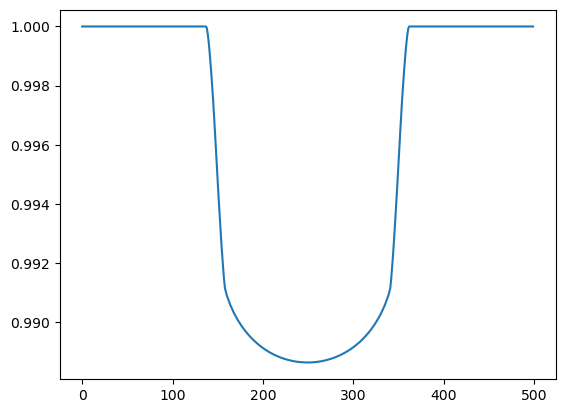

In [9]:
plot(flux)

In [ ]:
b = 0.35
rperiod = 0.25
tpole = 10_000

fig, axs = subplots(6, 3, figsize=(13,18), gridspec_kw=dict(height_ratios=(0.8, 0.2, 0.8, 0.2, 0.8, 0.2)))
for ix, az in enumerate((0, 0.25*pi, 0.5*pi)):
    for jx, istar in enumerate((0, 0.25*pi, 0.5*pi)): 
        tm.visualize(0.1, p, rho, b, e, w, az, rperiod, tpole, istar, beta, ldc, ntheta=25, ax=axs[ix*2, jx])
        flux = tm.evaluate_ps(k, rho, rperiod, tpole, phi, beta, ldc, t0, p, a, i, az, e, w)
        axs[ix*2+1, jx].plot(flux)
setp(axs[::2,:], aspect=1)
fig.tight_layout()

---

<center>©2024 Hannu Parviainen</center>